# DSC550_WK07.2.1_Kim-Schreck

In [1]:
# Part 1: PCA and Variance Threshold in a Linear Regression

In [2]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree, metrics
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [3]:
# 7.2.1.01
# Import the housing data as a data frame and ensure that the data is loaded properly.
# read data_description.txt as dt01

dt01 = open('WK07_data_description.txt', 'r')
print(dt01.read())

In [4]:
# 7.2.1.01
# Import the housing data as a data frame and ensure that the data is loaded properly.
# read sample_submission.csv as dt02

dt02 = pd.read_csv('WK07_sample_submission.csv')
print(dt02.head())

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


In [5]:
# 7.2.1.01
# Import the housing data as a data frame and ensure that the data is loaded properly.
# show columns dt02

list(dt02.columns)

['Id', 'SalePrice']

In [6]:
# 7.2.1.01
# Import the housing data as a data frame and ensure that the data is loaded properly.
# read test.csv as dt03

dt03 = pd.read_csv('WK07_test.csv')
print(dt03.head())

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [7]:
# 7.2.1.01
# Import the housing data as a data frame and ensure that the data is loaded properly.
# show columns dt03

list(dt03.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [8]:
# 7.2.1.01
# Import the housing data as a data frame and ensure that the data is loaded properly.
# read train.csv as dt04

dt04 = pd.read_csv('WK07_train.csv')
print(dt04.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [9]:
# 7.2.1.01
# Import the housing data as a data frame and ensure that the data is loaded properly.
# show columns dt04

list(dt04.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [10]:
# 7.2.1.02
# Drop the "Id" column and any features that are missing more than 40% of their values.
# calculate 40%> null dt03

val_nul = dt03.isnull().sum()
val_tot = dt03.count() + val_nul
perc03 = (val_nul / val_tot) * 100
print(perc03.head())

Id              0.000000
MSSubClass      0.000000
MSZoning        0.274160
LotFrontage    15.558602
LotArea         0.000000
dtype: float64


In [11]:
# 7.2.1.02
# Drop the "Id" column and any features that are missing more than 40% of their values.
# return all rows dt03

pd.set_option('display.max_rows', perc03.shape[0]+1)
print(perc03)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType       61.274846
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

In [12]:
# 7.2.1.02
# Drop the "Id" column and any features that are missing more than 40% of their values.
# remove columns dt03

dt03.drop(['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
print(dt03.head())

   MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
0          20       RH         80.0  ...    2010       WD        Normal
1          20       RL         81.0  ...    2010       WD        Normal
2          60       RL         74.0  ...    2010       WD        Normal
3          60       RL         78.0  ...    2010       WD        Normal
4         120       RL         43.0  ...    2010       WD        Normal

[5 rows x 73 columns]


In [13]:
# 7.2.1.02
# Drop the "Id" column and any features that are missing more than 40% of their values.
# calculate 40%> null dt04

val_nul = dt04.isnull().sum()
val_tot = dt04.count() + val_nul
perc04 = (val_nul / val_tot) * 100
print(perc04.head())

Id              0.000000
MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.739726
LotArea         0.000000
dtype: float64


In [14]:
# 7.2.1.02
# Drop the "Id" column and any features that are missing more than 40% of their values.
# return all rows dt04

pd.set_option('display.max_rows', perc04.shape[0]+1)
print(perc04)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [15]:
# 7.2.1.02
# Drop the "Id" column and any features that are missing more than 40% of their values.
# remove columns dt04

dt04.drop(['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
print(dt04.head())

   MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition SalePrice
0          60       RL         65.0  ...        WD        Normal    208500
1          20       RL         80.0  ...        WD        Normal    181500
2          60       RL         68.0  ...        WD        Normal    223500
3          70       RL         60.0  ...        WD       Abnorml    140000
4          60       RL         84.0  ...        WD        Normal    250000

[5 rows x 74 columns]


In [16]:
# 7.2.1.03
# For numerical columns, fill in any missing data with the median value.
# return numeric columns dt03

res03 = dt03.select_dtypes(include='number')
print(res03.head())

   MSSubClass  LotFrontage  LotArea  ...  MiscVal  MoSold  YrSold
0          20         80.0    11622  ...        0       6    2010
1          20         81.0    14267  ...    12500       6    2010
2          60         74.0    13830  ...        0       3    2010
3          60         78.0     9978  ...        0       6    2010
4         120         43.0     5005  ...        0       1    2010

[5 rows x 36 columns]


In [17]:
# 7.2.1.03
# For numerical columns, fill in any missing data with the median value.
# replace NA with median dt03

dt03['MSSubClass'].fillna(dt03['MSSubClass'].median(), inplace=True)
dt03['LotFrontage'].fillna(dt03['LotFrontage'].median(), inplace=True)
dt03['LotArea'].fillna(dt03['LotArea'].median(), inplace=True)
dt03['OverallQual'].fillna(dt03['OverallQual'].median(), inplace=True)
dt03['OverallCond'].fillna(dt03['OverallCond'].median(), inplace=True)
dt03['YearBuilt'].fillna(dt03['YearBuilt'].median(), inplace=True)
dt03['YearRemodAdd'].fillna(dt03['YearRemodAdd'].median(), inplace=True)
dt03['MasVnrArea'].fillna(dt03['MasVnrArea'].median(), inplace=True)
dt03['BsmtFinSF1'].fillna(dt03['BsmtFinSF1'].median(), inplace=True)
dt03['BsmtFinSF2'].fillna(dt03['BsmtFinSF2'].median(), inplace=True)
dt03['BsmtUnfSF'].fillna(dt03['BsmtUnfSF'].median(), inplace=True)
dt03['TotalBsmtSF'].fillna(dt03['TotalBsmtSF'].median(), inplace=True)
dt03['1stFlrSF'].fillna(dt03['1stFlrSF'].median(), inplace=True)
dt03['2ndFlrSF'].fillna(dt03['2ndFlrSF'].median(), inplace=True)
dt03['LowQualFinSF'].fillna(dt03['LowQualFinSF'].median(), inplace=True)
dt03['GrLivArea'].fillna(dt03['GrLivArea'].median(), inplace=True)
dt03['BsmtFullBath'].fillna(dt03['BsmtFullBath'].median(), inplace=True)
dt03['FullBath'].fillna(dt03['FullBath'].median(), inplace=True)
dt03['HalfBath'].fillna(dt03['HalfBath'].median(), inplace=True)
dt03['BedroomAbvGr'].fillna(dt03['BedroomAbvGr'].median(), inplace=True)
dt03['KitchenAbvGr'].fillna(dt03['KitchenAbvGr'].median(), inplace=True)
dt03['TotRmsAbvGrd'].fillna(dt03['TotRmsAbvGrd'].median(), inplace=True)
dt03['BsmtHalfBath'].fillna(dt03['BsmtHalfBath'].median(), inplace=True)
dt03['Fireplaces'].fillna(dt03['Fireplaces'].median(), inplace=True)
dt03['GarageYrBlt'].fillna(dt03['GarageYrBlt'].median(), inplace=True)
dt03['GarageCars'].fillna(dt03['GarageCars'].median(), inplace=True)
dt03['GarageArea'].fillna(dt03['GarageArea'].median(), inplace=True)
dt03['WoodDeckSF'].fillna(dt03['WoodDeckSF'].median(), inplace=True)
dt03['OpenPorchSF'].fillna(dt03['OpenPorchSF'].median(), inplace=True)
dt03['EnclosedPorch'].fillna(dt03['EnclosedPorch'].median(), inplace=True)
dt03['3SsnPorch'].fillna(dt03['3SsnPorch'].median(), inplace=True)
dt03['ScreenPorch'].fillna(dt03['ScreenPorch'].median(), inplace=True)
dt03['PoolArea'].fillna(dt03['PoolArea'].median(), inplace=True)
dt03['MiscVal'].fillna(dt03['MiscVal'].median(), inplace=True)
dt03['MoSold'].fillna(dt03['MoSold'].median(), inplace=True)
dt03['YrSold'].fillna(dt03['YrSold'].median(), inplace=True)

In [18]:
# 7.2.1.03
# For numerical columns, fill in any missing data with the median value.
# return numeric columns dt04

res04 = dt04.select_dtypes(include='number')
print(res04.head())

   MSSubClass  LotFrontage  LotArea  ...  MoSold  YrSold  SalePrice
0          60         65.0     8450  ...       2    2008     208500
1          20         80.0     9600  ...       5    2007     181500
2          60         68.0    11250  ...       9    2008     223500
3          70         60.0     9550  ...       2    2006     140000
4          60         84.0    14260  ...      12    2008     250000

[5 rows x 37 columns]


In [19]:
# 7.2.1.03
# For numerical columns, fill in any missing data with the median value.
# replace NA with median dt04

dt04['MSSubClass'].fillna(dt04['MSSubClass'].median(), inplace=True)
dt04['LotFrontage'].fillna(dt04['LotFrontage'].median(), inplace=True)
dt04['LotArea'].fillna(dt04['LotArea'].median(), inplace=True)
dt04['OverallQual'].fillna(dt04['OverallQual'].median(), inplace=True)
dt04['OverallCond'].fillna(dt04['OverallCond'].median(), inplace=True)
dt04['YearBuilt'].fillna(dt04['YearBuilt'].median(), inplace=True)
dt04['YearRemodAdd'].fillna(dt04['YearRemodAdd'].median(), inplace=True)
dt04['MasVnrArea'].fillna(dt04['MasVnrArea'].median(), inplace=True)
dt04['BsmtFinSF1'].fillna(dt04['BsmtFinSF1'].median(), inplace=True)
dt04['BsmtFinSF2'].fillna(dt04['BsmtFinSF2'].median(), inplace=True)
dt04['BsmtUnfSF'].fillna(dt04['BsmtUnfSF'].median(), inplace=True)
dt04['TotalBsmtSF'].fillna(dt04['TotalBsmtSF'].median(), inplace=True)
dt04['1stFlrSF'].fillna(dt04['1stFlrSF'].median(), inplace=True)
dt04['2ndFlrSF'].fillna(dt04['2ndFlrSF'].median(), inplace=True)
dt04['LowQualFinSF'].fillna(dt04['LowQualFinSF'].median(), inplace=True)
dt04['GrLivArea'].fillna(dt04['GrLivArea'].median(), inplace=True)
dt04['BsmtFullBath'].fillna(dt04['BsmtFullBath'].median(), inplace=True)
dt04['FullBath'].fillna(dt04['FullBath'].median(), inplace=True)
dt04['HalfBath'].fillna(dt04['HalfBath'].median(), inplace=True)
dt04['BedroomAbvGr'].fillna(dt04['BedroomAbvGr'].median(), inplace=True)
dt04['KitchenAbvGr'].fillna(dt04['KitchenAbvGr'].median(), inplace=True)
dt04['TotRmsAbvGrd'].fillna(dt04['TotRmsAbvGrd'].median(), inplace=True)
dt04['BsmtHalfBath'].fillna(dt04['BsmtHalfBath'].median(), inplace=True)
dt04['Fireplaces'].fillna(dt04['Fireplaces'].median(), inplace=True)
dt04['GarageYrBlt'].fillna(dt04['GarageYrBlt'].median(), inplace=True)
dt04['GarageCars'].fillna(dt04['GarageCars'].median(), inplace=True)
dt04['GarageArea'].fillna(dt04['GarageArea'].median(), inplace=True)
dt04['WoodDeckSF'].fillna(dt04['WoodDeckSF'].median(), inplace=True)
dt04['OpenPorchSF'].fillna(dt04['OpenPorchSF'].median(), inplace=True)
dt04['EnclosedPorch'].fillna(dt04['EnclosedPorch'].median(), inplace=True)
dt04['3SsnPorch'].fillna(dt04['3SsnPorch'].median(), inplace=True)
dt04['ScreenPorch'].fillna(dt04['ScreenPorch'].median(), inplace=True)
dt04['PoolArea'].fillna(dt04['PoolArea'].median(), inplace=True)
dt04['MiscVal'].fillna(dt04['MiscVal'].median(), inplace=True)
dt04['MoSold'].fillna(dt04['MoSold'].median(), inplace=True)
dt04['YrSold'].fillna(dt04['YrSold'].median(), inplace=True)
dt04['SalePrice'].fillna(dt04['SalePrice'].median(), inplace=True)

In [20]:
# 7.2.1.04
# For categorical columns, fill in any missing data with the most common value (mode).
# replace NA with mode dt03

dt03['MSZoning'].fillna(dt03['MSZoning'].mode(), inplace=True)
dt03['Street'].fillna(dt03['Street'].mode(), inplace=True)
dt03['LotShape'].fillna(dt03['LotShape'].mode(), inplace=True)
dt03['LandContour'].fillna(dt03['LandContour'].mode(), inplace=True)
dt03['Utilities'].fillna(dt03['Utilities'].mode(), inplace=True)
dt03['LotConfig'].fillna(dt03['LotConfig'].mode(), inplace=True)
dt03['LandSlope'].fillna(dt03['LandSlope'].mode(), inplace=True)
dt03['Neighborhood'].fillna(dt03['Neighborhood'].mode(), inplace=True)
dt03['Condition1'].fillna(dt03['Condition1'].mode(), inplace=True)
dt03['Condition2'].fillna(dt03['Condition2'].mode(), inplace=True)
dt03['BldgType'].fillna(dt03['BldgType'].mode(), inplace=True)
dt03['HouseStyle'].fillna(dt03['HouseStyle'].mode(), inplace=True)
dt03['RoofStyle'].fillna(dt03['RoofStyle'].mode(), inplace=True)
dt03['RoofMatl'].fillna(dt03['RoofMatl'].mode(), inplace=True)
dt03['Exterior1st'].fillna(dt03['Exterior1st'].mode(), inplace=True)
dt03['Exterior2nd'].fillna(dt03['Exterior2nd'].mode(), inplace=True)
dt03['ExterQual'].fillna(dt03['ExterQual'].mode(), inplace=True)
dt03['ExterCond'].fillna(dt03['ExterCond'].mode(), inplace=True)
dt03['Foundation'].fillna(dt03['Foundation'].mode(), inplace=True)
dt03['BsmtQual'].fillna(dt03['BsmtQual'].mode(), inplace=True)
dt03['BsmtCond'].fillna(dt03['BsmtCond'].mode(), inplace=True)
dt03['BsmtExposure'].fillna(dt03['BsmtExposure'].mode(), inplace=True)
dt03['BsmtFinType1'].fillna(dt03['BsmtFinType1'].mode(), inplace=True)
dt03['BsmtFinType2'].fillna(dt03['BsmtFinType2'].mode(), inplace=True)
dt03['Heating'].fillna(dt03['Heating'].mode(), inplace=True)
dt03['HeatingQC'].fillna(dt03['HeatingQC'].mode(), inplace=True)
dt03['CentralAir'].fillna(dt03['CentralAir'].mode(), inplace=True)
dt03['Electrical'].fillna(dt03['Electrical'].mode(), inplace=True)
dt03['KitchenQual'].fillna(dt03['KitchenQual'].mode(), inplace=True)
dt03['Functional'].fillna(dt03['Functional'].mode(), inplace=True)
dt03['GarageType'].fillna(dt03['GarageType'].mode(), inplace=True)
dt03['GarageFinish'].fillna(dt03['GarageFinish'].mode(), inplace=True)
dt03['GarageQual'].fillna(dt03['GarageQual'].mode(), inplace=True)
dt03['GarageCond'].fillna(dt03['GarageCond'].mode(), inplace=True)
dt03['PavedDrive'].fillna(dt03['PavedDrive'].mode(), inplace=True)
dt03['SaleType'].fillna(dt03['SaleType'].mode(), inplace=True)
dt03['SaleCondition'].fillna(dt03['SaleCondition'].mode(), inplace=True)

In [21]:
# 7.2.1.04
# For categorical columns, fill in any missing data with the most common value (mode).
# replace NA with mode dt04

dt04['MSZoning'].fillna(dt04['MSZoning'].mode(), inplace=True)
dt04['Street'].fillna(dt04['Street'].mode(), inplace=True)
dt04['LotShape'].fillna(dt04['LotShape'].mode(), inplace=True)
dt04['LandContour'].fillna(dt04['LandContour'].mode(), inplace=True)
dt04['Utilities'].fillna(dt04['Utilities'].mode(), inplace=True)
dt04['LotConfig'].fillna(dt04['LotConfig'].mode(), inplace=True)
dt04['LandSlope'].fillna(dt04['LandSlope'].mode(), inplace=True)
dt04['Neighborhood'].fillna(dt04['Neighborhood'].mode(), inplace=True)
dt04['Condition1'].fillna(dt04['Condition1'].mode(), inplace=True)
dt04['Condition2'].fillna(dt04['Condition2'].mode(), inplace=True)
dt04['BldgType'].fillna(dt04['BldgType'].mode(), inplace=True)
dt04['HouseStyle'].fillna(dt04['HouseStyle'].mode(), inplace=True)
dt04['RoofStyle'].fillna(dt04['RoofStyle'].mode(), inplace=True)
dt04['RoofMatl'].fillna(dt04['RoofMatl'].mode(), inplace=True)
dt04['Exterior1st'].fillna(dt04['Exterior1st'].mode(), inplace=True)
dt04['Exterior2nd'].fillna(dt04['Exterior2nd'].mode(), inplace=True)
dt04['ExterQual'].fillna(dt04['ExterQual'].mode(), inplace=True)
dt04['ExterCond'].fillna(dt04['ExterCond'].mode(), inplace=True)
dt04['Foundation'].fillna(dt04['Foundation'].mode(), inplace=True)
dt04['BsmtQual'].fillna(dt04['BsmtQual'].mode(), inplace=True)
dt04['BsmtCond'].fillna(dt04['BsmtCond'].mode(), inplace=True)
dt04['BsmtExposure'].fillna(dt04['BsmtExposure'].mode(), inplace=True)
dt04['BsmtFinType1'].fillna(dt04['BsmtFinType1'].mode(), inplace=True)
dt04['BsmtFinType2'].fillna(dt04['BsmtFinType2'].mode(), inplace=True)
dt04['Heating'].fillna(dt04['Heating'].mode(), inplace=True)
dt04['HeatingQC'].fillna(dt04['HeatingQC'].mode(), inplace=True)
dt04['CentralAir'].fillna(dt04['CentralAir'].mode(), inplace=True)
dt04['Electrical'].fillna(dt04['Electrical'].mode(), inplace=True)
dt04['KitchenQual'].fillna(dt04['KitchenQual'].mode(), inplace=True)
dt04['Functional'].fillna(dt04['Functional'].mode(), inplace=True)
dt04['GarageType'].fillna(dt04['GarageType'].mode(), inplace=True)
dt04['GarageFinish'].fillna(dt04['GarageFinish'].mode(), inplace=True)
dt04['GarageQual'].fillna(dt04['GarageQual'].mode(), inplace=True)
dt04['GarageCond'].fillna(dt04['GarageCond'].mode(), inplace=True)
dt04['PavedDrive'].fillna(dt04['PavedDrive'].mode(), inplace=True)
dt04['SaleType'].fillna(dt04['SaleType'].mode(), inplace=True)
dt04['SaleCondition'].fillna(dt04['SaleCondition'].mode(), inplace=True)
dt04['SalePrice'].fillna(dt04['SalePrice'].mode(), inplace=True)

In [22]:
# 7.2.1.05
# Convert the categorical columns to dummy variables.
# convert dummy variables dt03

dt03 = dt03.copy() 
dt03_dv = pd.get_dummies(dt03, columns = [
    'MSZoning',
    'Street',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'SaleType',
    'SaleCondition'
    ])
display(dt03_dv)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1979.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,Fals

In [23]:
# 7.2.1.05
# Convert the categorical columns to dummy variables.
# convert dummy variables dt04

dt_04_dv = pd.get_dummies(dt04, drop_first=True)

In [24]:
# 7.2.1.05
# Convert the categorical columns to dummy variables.
# return dummy variables dt04

dt_04_dv.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,True,...,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,True,...,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,True,...,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,True,...,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,True,...,True,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False


In [25]:
# 7.2.1.06
# Split the data into a training and test set, where the SalePrice column is the target.
# select columns dt04

x_04 = dt_04_dv.drop(['SalePrice'], axis=1)
y_04 = dt_04_dv['SalePrice']

In [26]:
# 7.2.1.06
# Split the data into a training and test set, where the SalePrice column is the target.
# split into train and test dt04

x_04_trn, x_04_tst, y_04_trn, y_04_tst = train_test_split(x_04, y_04, test_size=0.3, random_state=0)

In [27]:
# 7.2.1.07
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign regression variable dt04

dt04_lr = LinearRegression()

In [28]:
# 7.2.1.07
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model dt04

dt04_lr.fit(x_04_trn, y_04_trn)

LinearRegression()

In [29]:
# 7.2.1.07
# Run a linear regression and report the R2-value and RMSE on the test set.
# fit variables to model dt04

y_04_pdct = dt04_lr.predict(x_04_tst)

In [30]:
# 7.2.1.07
# Run a linear regression and report the R2-value and RMSE on the test set.
# assign variable for rmse and r2 dt04

dt04_rmse = np.sqrt(mean_squared_error(y_04_tst, y_04_pdct))
dt04_r2 = r2_score(y_04_tst, y_04_pdct)

In [31]:
# 7.2.1.07
# Run a linear regression and report the R2-value and RMSE on the test set.
# return rmse and r2 dt04

print(f'rmse: {dt04_rmse}')
print(f'r2: {dt04_r2}')

rmse: 47426.6264432209
r2: 0.6686864440256621


In [32]:
# 7.2.1.08
# Fit and transform the training features with a PCA so that 90% of the variance is retained.
# assign variable pca dt04

pca = PCA(.9)

In [33]:
# 7.2.1.08
# Fit and transform the training features with a PCA so that 90% of the variance is retained.
# assign variable pca fit train test dt04

pca.fit(x_04_trn)
pca_x_04_trn = pca.transform(x_04_trn)
pca_x_04_tst = pca.transform(x_04_tst)

In [34]:
# 7.2.1.09
# How many features are in the PCA-transformed matrix?
# show results original number dt04

print(f'features in pca matrix: {pca_x_04_trn.shape[1]}')

features in pca matrix: 1


In [35]:
# 7.2.1.11
# Repeat step 7 with your PCA transformed data.
# fit predict dt04

dt04_lr.fit(pca_x_04_trn, y_04_trn)
y_04_pdct = dt04_lr.predict(pca_x_04_tst)

In [36]:
# 7.2.1.11
# Repeat step 7 with your PCA transformed data.
# assign variables rmse and r2 dt04

dt04_pca_rmse = np.sqrt(mean_squared_error(y_04_tst, y_04_pdct))
dt04_pca_r2 = r2_score(y_04_tst, y_04_pdct)

In [37]:
# 7.2.1.11
# Repeat step 7 with your PCA transformed data.
# return rmse and r2 dt04

print(f'rmse: {dt04_pca_rmse}')
print(f'r2: {dt04_pca_r2}')

rmse: 79269.95644040026
r2: 0.074424228001154


In [38]:
# 7.2.1.12
# Take your original training features (from step 6) and apply a min-max scaler to them.
# assign variable scaler dt04

sclr = MinMaxScaler()

In [39]:
# 7.2.1.12
# Take your original training features (from step 6) and apply a min-max scaler to them.
# scaler fit to dt04

sclr.fit(x_04_trn)

MinMaxScaler()

In [40]:
# 7.2.1.13
# Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).
# scaler fit to dt04

x_04_trn_sclr = sclr.transform(x_04_trn)
x_04_tst_sclr = sclr.transform(x_04_tst)

In [41]:
# 7.2.1.13
# Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).
# set var hvf

th_var = 0.1
hvf = x_04_trn_sclr[:, np.var(x_04_trn_sclr, axis=0) > th_var]

In [42]:
# 7.2.1.14
# Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
# fit predict dt04

dt04_lr.fit(x_04_trn_sclr, y_04_trn)
y_04_pdct_sclr = dt04_lr.predict(x_04_tst_sclr)

In [43]:
# 7.2.1.14
# Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
# assign variables

dt04_pca_rmse_sclr = np.sqrt(mean_squared_error(y_04_tst, y_04_pdct_sclr))
dt04_pca_r2_sclr = r2_score(y_04_tst, y_04_pdct_sclr)

In [44]:
# 7.2.1.14
# Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
# return rmse r2

print(f'rmse: {dt04_pca_rmse_sclr}')
print(f'r2: {dt04_pca_r2_sclr}')

rmse: 2165817821220179.0
r2: -6.909372143868104e+20


In [45]:
# 7.2.1.15
# Repeat step 7 with the high variance data.
# assign variables

x_04_tst_sclr = sclr.transform(x_04_tst)
x_04_tst_sclr_hv = x_04_tst_sclr[:, np.var(x_04_trn_sclr, axis=0) > th_var]

In [46]:
# 7.2.1.15
# Repeat step 7 with the high variance data.
# fit predict with high variance dt04

dt04_lr.fit(hvf, y_04_trn)
y_04_pdct_sclr_hv = dt04_lr.predict(x_04_tst_sclr_hv)
dt04_pca_rmse_sclr_hv = np.sqrt(mean_squared_error(y_04_tst, y_04_pdct_sclr_hv))
dt04_pca_r2_sclr_hv = r2_score(y_04_tst, y_04_pdct_sclr_hv)

In [47]:
# 7.2.1.15
# Repeat step 7 with the high variance data.
# return rmse r2 dt04

print("rmse:", dt04_pca_rmse_sclr_hv)
print("r2:", dt04_pca_r2_sclr_hv)

rmse: 53232.616716926335
r2: 0.5826019951309291


In [48]:
# 7.2.1.16
# Summarize your findings.
# return linear regression dt04

print("rmse:", dt04_rmse)
print("r2:", dt04_r2)

rmse: 47426.6264432209
r2: 0.6686864440256621


In [49]:
# 7.2.1.16
# Summarize your findings.
# return pca dt04

print("rmse:", dt04_pca_rmse)
print("r2:", dt04_pca_r2)

rmse: 79269.95644040026
r2: 0.074424228001154


In [50]:
# 7.2.1.16
# Summarize your findings.
# return high variance dt04

print("rmse:", dt04_pca_rmse_sclr_hv)
print("r2:", dt04_pca_r2_sclr_hv)

rmse: 53232.616716926335
r2: 0.5826019951309291


# DSC550_WK07.2.2_Kim-Schreck

In [51]:
# Part 2: Categorical Feature Selection

In [52]:
# 7.2.2.01
# Import the data as a data frame and ensure it is loaded correctly.
# read csv dt05

dt05 = pd.read_csv('mushrooms.csv')

In [53]:
# 7.2.2.01
# Import the data as a data frame and ensure it is loaded correctly.
# return head dt05

dt05.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [54]:
# 7.2.2.02
# Convert the categorical features (all of them) to dummy variables.
# assign variables label encoder dt05

lbl_ncdr = preprocessing.LabelEncoder()

In [55]:
# 7.2.2.02
# Convert the categorical features (all of them) to dummy variables.
# assign variables class dt05

dt05['class'] = lbl_ncdr.fit_transform(dt05['class'])

In [56]:
# 7.2.2.02
# Convert the categorical features (all of them) to dummy variables.
# assign variables columns dt05

dt05_clm = list(dt05.columns)

In [57]:
# 7.2.2.02
# Convert the categorical features (all of them) to dummy variables.
# transform dt05

for i in range(len(dt05_clm)):
    dt05[dt05_clm[i]] = LabelEncoder().fit_transform(dt05[dt05_clm[i]])

In [58]:
# 7.2.2.02
# Convert the categorical features (all of them) to dummy variables.
# transform dt05

print(dt05.head())
y_05 = dt05['class']
dt05 = dt05.drop(['class'], axis=1)

   class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0      1          5            2  ...                  2           3        5
1      0          5            2  ...                  3           2        1
2      0          0            2  ...                  3           2        3
3      1          5            3  ...                  2           3        5
4      0          5            2  ...                  3           0        1

[5 rows x 23 columns]


In [59]:
# 7.2.2.03
# Split the data into a training and test set.
# assign variables dt05

x_05_trn, x_05_tst, y_05_trn, y_05_tst = train_test_split(dt05, y_05, test_size=0.3)

In [60]:
# 7.2.2.04
# Fit a decision tree classifier on the training set.
# decision tree with criterion gini index dt05

dt05_cri = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state=0)

In [61]:
# 7.2.2.04
# Fit a decision tree classifier on the training set.
# model dt05

dt05_cri.fit(x_05_trn, y_05_trn)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [62]:
# 7.2.2.05
# Report the accuracy and create a confusion matrix for the model prediction on the test set.
# assign variable accuracy dt05

y_05_pdt = dt05_cri.predict(x_05_tst)

In [63]:
# 7.2.2.05
# Report the accuracy and create a confusion matrix for the model prediction on the test set.
# return accuracy dt05

print('accuracy: {0:0.4f}'.format(accuracy_score(y_05_tst, y_05_pdt)))

accuracy: 0.9545


[Text(0.5, 0.875, 'x[8] <= 3.5\ngini = 0.5\nsamples = 5686\nvalue = [2925, 2761]'),
 Text(0.25, 0.625, 'x[20] <= 3.5\ngini = 0.281\nsamples = 2353\nvalue = [397, 1956]'),
 Text(0.125, 0.375, 'x[19] <= 1.5\ngini = 0.222\nsamples = 424\nvalue = [370, 54]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.1875, 0.125, 'gini = 0.084\nsamples = 387\nvalue = [370, 17]'),
 Text(0.375, 0.375, 'x[10] <= 2.0\ngini = 0.028\nsamples = 1929\nvalue = [27, 1902]'),
 Text(0.3125, 0.125, 'gini = 0.008\nsamples = 1910\nvalue = [8, 1902]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.75, 0.625, 'x[19] <= 1.5\ngini = 0.366\nsamples = 3333\nvalue = [2528, 805]'),
 Text(0.625, 0.375, 'x[10] <= 0.5\ngini = 0.203\nsamples = 497\nvalue = [57, 440]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 440\nvalue = [0, 440]'),
 Text(0.875, 0.375, 'x[7] <= 0.5\ngini = 0.224\nsamples = 2836\nvalue 

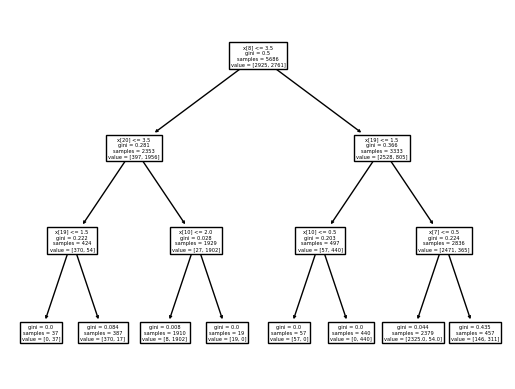

In [64]:
# 7.2.2.06
# Create a visualization of the decision tree.
# plot dt05

tree.plot_tree(dt05_cri.fit(x_05_trn, y_05_trn))

In [65]:
# 7.2.2.07
# Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
# assign variable chi2 dt05

dt05_slct = SelectKBest(score_func = chi2, k = 5)

In [66]:
# 7.2.2.07
# Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
# fit dt05

dt05_slct.fit(dt05.fillna(0), y_05)

SelectKBest(k=5, score_func=<function chi2 at 0x132a90c20>)

In [67]:
# 7.2.2.07
# Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
# return columns dt05

dt05.columns[dt05_slct.get_support()].to_numpy()

array(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'],
      dtype=object)

In [68]:
# 7.2.2.07
# Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
# assign variable 01 dt05

dt05_slct_01 = dt05_slct.transform(dt05)

In [69]:
# 7.2.2.07
# Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
# assign variable 02 dt05

dt05_slct_01 = pd.DataFrame(dt05_slct_01)

In [70]:
# 7.2.2.08
# Which five features were selected in step 7?
# return five features dt05

dt05.columns[dt05_slct.get_support()].to_numpy()

array(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'],
      dtype=object)

In [71]:
# 7.2.2.09
# Repeat steps 4 and 5 with the five best features selected in step 7.
# assign variables for split dt05

x_05_trn_01, x_05_tst_01, y_05_trn_01, y_05_tst_01 = train_test_split(dt05_slct_01, y_05, test_size=0.3)

In [72]:
# 7.2.2.09
# Repeat steps 4 and 5 with the five best features selected in step 7.
# fit model dt05

dt05_cri.fit(x_05_trn, y_05_trn)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [73]:
# 7.2.2.09
# Repeat steps 4 and 5 with the five best features selected in step 7.
# fit model dt05

dt05_cri_pdt_y = dt05_cri.predict(x_05_tst)

In [74]:
# 7.2.2.09
# Repeat steps 4 and 5 with the five best features selected in step 7.
# return accuracy dt05

print('accuracy: {0:0.4f}'.format(accuracy_score(y_05_tst, dt05_cri_pdt_y)))

accuracy: 0.9545


In [75]:
# 7.2.2.09
# Repeat steps 4 and 5 with the five best features selected in step 7.
# return confusion matrix dt05

print(confusion_matrix(y_05_tst, dt05_cri_pdt_y))

[[1209   74]
 [  37 1118]]


In [76]:
# 7.2.2.10
# Summarize your findings.
# return linear regression dt04

print('accuracy 01: {0:0.4f}'.format(accuracy_score(y_05_tst, y_05_pdt)))

accuracy 01: 0.9545


In [77]:
# 7.2.2.10
# Summarize your findings.
# return linear regression dt04

print('accuracy 02: {0:0.4f}'.format(accuracy_score(y_05_tst, dt05_cri_pdt_y)))

accuracy 02: 0.9545
